<a href="https://colab.research.google.com/github/franklinperseuDS/TrabalhoModulo03/blob/main/trabalhoEstatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pacotes necessários
import pandas as pd
import numpy as np
import statistics as st
import seaborn as se
import statsmodels.stats.proportion as smp
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
soma = 0

for impa in range(10):
    impa 
print(soma)


0


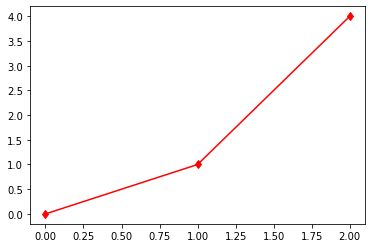

In [3]:
plt.plot([0,1,2],[0,1,4],'rd-')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DataFrames

In [5]:
"""dfMicroDados =  pd.read_csv('/content/drive/Shared drives/Trabalho Estátistica/MICRODADOS_ENADE_2016.csv',sep=';',decimal=',')
dfMicroDados.shape
"""

"dfMicroDados =  pd.read_csv('/content/drive/Shared drives/Trabalho Estátistica/MICRODADOS_ENADE_2016.csv',sep=';',decimal=',')\ndfMicroDados.shape\n"

In [6]:
dfConceito = pd.read_excel('/content/drive/Shared drives/Trabalho Estátistica/conceito_enade2016.xlsx')

In [ ]:
dfConceito.info()

## Tratamento do Dataframe 'Conceito' para as seguintes colunas
 1. codigo da IES 
 2. Sigla da IES 
 3. Organização Acadêmica 
 4. 'Município do Curso' 
 5. 'Sigla da UF' 
 6. Concluintes Inscritos 
 7. 'Concluintes Participantes 
 8. <s> 'Nota Bruta - FG', #* deixar por ultimo</s>
 9. 'Nota Padronizada - FG' 
 10. <s> 'Nota Bruta - CE', #* deixar por ultimo </s>
 11. 'Nota Padronizada - CE', 
 12. 'Conceito Enade (Contínuo)' 
 13. Conceito Enade (Faixa)
 14. Código da Área




In [8]:
dfMedicinaC = dfConceito[dfConceito['Área de Enquadramento'] == 'MEDICINA'][['Código da Área','Código da IES','Sigla da IES','Município do Curso', 'Sigla da UF','Concluintes Inscritos', 'Concluintes Participantes','Nota Padronizada - FG','Nota Padronizada - CE','Conceito Enade (Contínuo)','Conceito Enade (Faixa)']]

In [9]:
dfMedicinaC['Conceito Enade (Faixa)'] = dfMedicinaC['Conceito Enade (Faixa)'].astype(int)

In [10]:
dfMedicinaC = dfMedicinaC.reset_index()

## Montando uma coluna de regiões
1 = Região Norte (NO)
norte = ['RO','AC','AM','RR' ,'PA' , 'AP' ,'TO']

2 = Região Nordeste (NE)
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']

3 = Região Sudeste (SE)
sudeste = ['MG','ES','RJ,'SP']

4 = Região Sul (SUL)
sul = ['PR','SC','RS']

5 = Região Centro-Oeste (CO)
CentroOeste = ['MS','MT','GO','DF']

In [11]:
norte = ['RO','AC','AM','RR' ,'PA' , 'AP' ,'TO']
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']
sudeste = ['MG','ES','RJ','SP']
sul = ['PR','SC','RS']
centroOeste = ['MS','MT','GO','DF']

In [12]:
dfMedicinaC['Regiao'] = np.nan

In [ ]:
#dfMedicinaC['Regiao'] = dfMedicinaC['Regiao'].astype(int)

In [14]:
condicao = [np.isin(dfMedicinaC['Sigla da UF'], norte),
            np.isin(dfMedicinaC['Sigla da UF'], nordeste),
            np.isin(dfMedicinaC['Sigla da UF'], sudeste),
            np.isin(dfMedicinaC['Sigla da UF'], sul),
           np.isin(dfMedicinaC['Sigla da UF'],  centroOeste)]

resultados = [1,2,3,4,5]

dfMedicinaC['Regiao'] = np.select(condicao, resultados)

In [16]:
dfMedicinaC.head()

,index,Código da Área,Código da IES,Sigla da IES,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Padronizada - FG,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Regiao
0,2,12,1,UFMT,CUIABÁ,MT,35,33,3.473179,2.759319,2.937784,3,5
1,8,12,2,UNB,BRASÍLIA,DF,89,85,3.436836,2.841475,2.990315,4,5
2,13,12,3,UFS,ARACAJU,SE,53,53,2.643099,2.658829,2.654896,3,2
3,17,12,4,UFAM,MANAUS,AM,36,35,4.273778,2.299221,2.792860,3,1
4,21,12,5,UFPI,TERESINA,PI,45,45,3.533455,3.565352,3.557378,4,2


In [133]:
#Celula para verificar colunas


Número de inscritos por região:
1. Norte = 16
2. Norte = 39
3. Norte = 78
4. Norte = 31
5. Norte = 12


#ITEM A


##Notas Gerais


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE Nota Pardonizada CE')

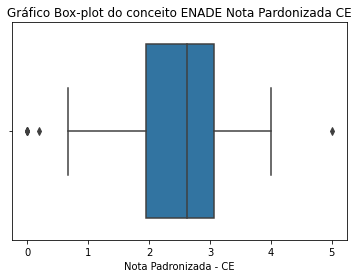

In [17]:
se.boxplot(dfMedicinaC['Nota Padronizada - CE']).set_title('Gráfico Box-plot do conceito ENADE Nota Pardonizada CE')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE Nota Pardonizada FG')

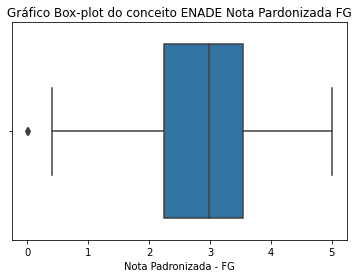

In [18]:
se.boxplot(dfMedicinaC['Nota Padronizada - FG']).set_title('Gráfico Box-plot do conceito ENADE Nota Pardonizada FG')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    176.000000
mean       3.119318
std        0.850191
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Conceito Enade (Faixa), dtype: float64

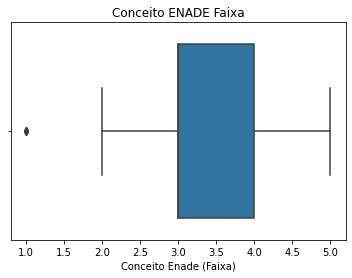

In [20]:
#Conceito Enade (Faixa)
se.boxplot(dfMedicinaC['Conceito Enade (Faixa)']).set_title('Conceito ENADE Faixa')
dfMedicinaC['Conceito Enade (Faixa)'].describe()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE contínuo de Medicina')

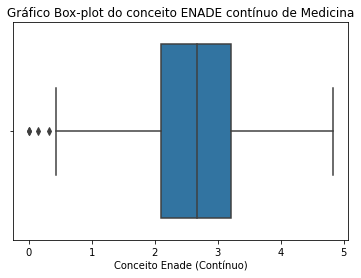

In [21]:
se.boxplot(dfMedicinaC['Conceito Enade (Contínuo)']).set_title('Gráfico Box-plot do conceito ENADE contínuo de Medicina')

## Gráficos por Região



CO_REGIAO_CURSO
1. = Região Norte (NO)
2. = Região Nordeste (NE)
3. = Região Centro-Oeste (CO)
4. = Região Sul (SUL)
5. =  Região Sudeste (SE)

In [136]:
contagemNorte = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 1].count()
contagemNordeste = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 2].count()
contagemSudeste = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 3].count()
contagemSul = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 4].count()
contagemCentroOeste=dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 5].count()

print ('Número de inscritos por região:')
print (f'1. Norte = {contagemNorte}')
print (f'2. Nordeste = {contagemNordeste}')
print (f'3. Sudeste = {contagemSudeste}')
print (f'4. Sul = {contagemSul}')
print (f'5. Centro-Oeste = {contagemCentroOeste}')
print(f'Total = {contagemNorte + contagemNordeste + contagemSudeste + contagemSul + contagemCentroOeste}')

Número de inscritos por região:
1. Norte = 16
2. Nordeste = 39
3. Sudeste = 78
4. Sul = 31
5. Centro-Oeste = 12
Total = 176


###Boxsplot - Nota Padronizada FG

In [ ]:
NomeDaColuna = 'Nota Padronizada - FG'

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Nota Padronizada - FG

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NPCE, stat='frequency').set_title(F"{NPCE}  - Região Sudeste x= NPCE, stat='frequency').set_title(F"{NPCE} ")

###Boxsplot - Nota Padronizada - CE

In [149]:
NomeDaColuna = 'Nota Padronizada - CE'

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Nota Padronizada - CE

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NPCE, stat='frequency').set_title(F"{NPCE}  - Região Sudeste x= NPCE, stat='frequency').set_title(F"{NPCE} ")

###Boxsplot - Conceito Enade (Faixa)

In [ ]:
NomeDaColuna = 'Conceito Enade (Faixa)'

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Conceito Enade (Faixa)

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sudeste x= NPCE, stat='frequency').set_title(F"{NPCE} ")

###Boxsplot - Conceito Enade (Contínuo)

In [156]:
NomeDaColuna = 'Conceito Enade (Contínuo)'

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

In [ ]:
NomeDaColunase.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Conceito Enade (Faixa)

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

In [155]:
NomeDaColunase.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

NameError: ignored

Text(0.5, 1.0, 'Conceito Enade (Contínuo)  - Região Sudeste  ')

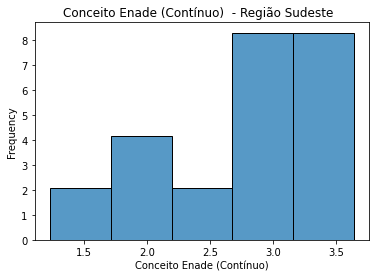

In [157]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sudeste  ")

# **ITEM B**


In [22]:
dfMedicinaC.head()

,index,Código da Área,Código da IES,Sigla da IES,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Padronizada - FG,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Regiao
0,2,12,1,UFMT,CUIABÁ,MT,35,33,3.473179,2.759319,2.937784,3,5
1,8,12,2,UNB,BRASÍLIA,DF,89,85,3.436836,2.841475,2.990315,4,5
2,13,12,3,UFS,ARACAJU,SE,53,53,2.643099,2.658829,2.654896,3,2
3,17,12,4,UFAM,MANAUS,AM,36,35,4.273778,2.299221,2.792860,3,1
4,21,12,5,UFPI,TERESINA,PI,45,45,3.533455,3.565352,3.557378,4,2


In [23]:
# cria variáveis para as colunas
conc_inscritos = dfMedicinaC['Concluintes Inscritos']
conc_participantes = dfMedicinaC['Concluintes Participantes']
nota_fg = dfMedicinaC['Nota Padronizada - FG']
nota_ce = dfMedicinaC['Nota Padronizada - CE']
conceito_cont = dfMedicinaC['Conceito Enade (Contínuo)']
conceito_faixa = dfMedicinaC['Conceito Enade (Faixa)']

In [24]:
# função para calcular simetria
def calc_simetria(media, mediana, moda):
  if (media > mediana):
    return 'ASSIMÉTRICA POSITIVA'
  elif (media < mediana):
    return 'ASSIMÉTRICA NEGATIVA'
  else:
    return 'SIMÉTRICA'

## **B - Variável 'Concluintes Inscritos'**

In [25]:
# Info
conc_inscritos.describe()

count    176.000000
mean      90.017045
std       48.043370
min       20.000000
25%       55.750000
50%       84.000000
75%      108.000000
max      308.000000
Name: Concluintes Inscritos, dtype: float64

In [26]:
# Criar lista
inscritos_array = np.array(conc_inscritos, dtype = float)
print (inscritos_array)

[ 35.  89.  53.  36.  45.  86. 165.  63.  77.  87.  83. 133.  95.  68.
 163.  48. 106.  86.  42.  65.  75. 102.  62.  84. 166. 105.  71. 308.
  77.  85.  93.  96. 105.  47. 148. 114.  55.  76. 102. 108. 174.  88.
  89.  64. 127.  95.  89. 169.  99.  98.  75. 178.  86. 160. 159.  88.
 305. 154.  42.  70. 114.  73. 276. 132.  98. 131. 102.  84. 256. 121.
  75.  44.  95.  84. 117. 160.  63.  87.  25. 133.  53. 217. 109.  47.
  68.  82.  62.  64.  50.  82. 106.  56. 108.  74. 101.  85.  64.  37.
  52.  41.  74.  36.  60.  59.  69. 129.  82. 109.  52. 117.  30. 167.
  52. 101.  33.  72.  36.  50.  28.  88.  28.  99.  87. 173.  47. 138.
 119. 117.  81. 113.  88.  97.  31. 102.  61.  94.  77.  93. 109.  81.
 146.  54.  75. 144.  34. 120.  39. 139.  58. 119.  54.  96.  50.  98.
  74.  63. 110.  74.  75. 104. 105.  51.  49. 124.  76.  44.  30.  38.
  29.  46.  20.  27.  35.  54.  85.  84.]


In [27]:
# Média
ci_media = st.mean(inscritos_array)
ci_media

90.01704545454545

In [28]:
# Mediana
ci_mediana = st.median(inscritos_array)
ci_mediana

84.0

In [29]:
# Moda
ci_moda = st.mode(inscritos_array) # st.multimode(inscritos_array)
ci_moda

75.0

In [30]:
# Desvio-padrão
ci_desvio_padrao = np.std(inscritos_array)
ci_desvio_padrao

47.906688946493844

In [31]:
# Coeficiente de variação
#ci_coef_variacao = np.var(inscritos_array)
ci_coef_variacao = ci_desvio_padrao/ci_media
cv_ci = ci_coef_variacao
cv_ci

0.5321957492004619

A variável é ASSIMÉTRICA POSITIVA



Text(0.5, 1.0, 'Gráfico Box-plot dos concluintes inscritos')

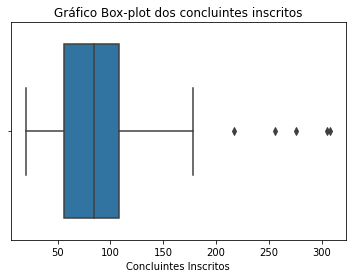

In [32]:
# Simetria
print("A variável é", calc_simetria(ci_media, ci_mediana, ci_moda))
print()
se.boxplot(x = dfMedicinaC['Concluintes Inscritos'], ).set_title('Gráfico Box-plot dos concluintes inscritos')

## **B - Variável 'Concluintes Participantes'**

In [33]:
# Info
conc_participantes.describe()

count    176.000000
mean      88.244318
std       47.072740
min       18.000000
25%       54.750000
50%       83.500000
75%      106.250000
max      303.000000
Name: Concluintes Participantes, dtype: float64

In [34]:
# Criar lista
participantes_array = np.array(conc_participantes, dtype = float)
print (participantes_array)

[ 33.  85.  53.  35.  45.  86. 164.  63.  77.  87.  83. 133.  93.  68.
 162.  47. 106.  86.  42.  65.  75. 102.  62.  83. 163. 105.  71. 297.
  77.  85.  91.  94. 103.  46. 146. 113.  55.  76. 102. 107. 172.  88.
  88.  64. 126.  95.  88. 167.  95.  97.  75. 167.  84. 156. 155.  87.
 303. 149.  41.  69. 111.  72. 275. 129.  98. 126. 101.  84. 254. 116.
  75.  44.  95.  84. 117. 157.  62.  85.  24. 133.  53. 217. 106.  37.
  65.  81.  61.  64.  48.  82. 104.  53. 108.  74.  65.  84.  64.  37.
  52.  39.  74.  34.  60.  59.  68. 127.  82. 108.  52. 115.  30. 164.
  48.  97.  27.  71.  36.  50.  28.  88.  28.  98.  83. 117.  47. 138.
 118. 117.  79. 110.  88.  96.  31. 101.  61.  94.  76.  92. 107.  75.
 142.  54.  75. 142.  34. 120.  38. 139.  58. 116.  53.  96.  49.  96.
  72.  61. 107.  72.  73. 104. 105.  51.  49. 124.  75.  43.  30.  37.
  29.  45.  18.  26.  34.  53.  85.  84.]


In [35]:
# Média
cp_media = st.mean(participantes_array)
cp_media

88.24431818181819

In [36]:
# Mediana
cp_mediana = st.median(participantes_array)
cp_mediana

83.5

In [37]:
# Moda
cp_moda = st.mode(participantes_array) # st.multimode(inscritos_array)
cp_moda

75.0

In [38]:
# Desvio-padrão
cp_desvio_padrao = np.std(participantes_array)
cp_desvio_padrao

46.93881984696711

In [39]:
# Coeficiente de variação
#cp_coef_variacao = np.var(participantes_array)
cp_coef_variacao = cp_desvio_padrao/cp_media
cv_cp = cp_coef_variacao
cp_coef_variacao


0.5319188908033101

In [ ]:
# Simetria
print("A variável é", calc_simetria(media, mediana, moda))
print()
se.boxplot(x = dfMedicinaC['Concluintes Participantes'], ).set_title('Gráfico Box-plot dos concluintes participantes')

# ITEM C

## C - Variável Nota Padronizada - FG

In [ ]:
notaFG_array = np.array(nota_fg, dtype = float)
print (notaFG_array)

In [42]:
# Média
fg_media = st.mean(notaFG_array)
fg_media

2.8284516279077665

In [43]:
# Mediana
fg_mediana = st.median(notaFG_array)
fg_mediana

2.977254033088684

In [44]:
# Moda
fg_moda = st.mode(notaFG_array) # st.multimode(inscritos_array)
fg_moda

StatisticsError: ignored

In [45]:
# Desvio Padrao
fg_std = np.std(notaFG_array)
fg_std

0.9941442094201961

In [46]:
# Coeficiente de variação
fg_coef_variacao = fg_std/fg_media
cv_fg = fg_coef_variacao
fg_coef_variacao

0.35148001104603455

Text(0.5, 1.0, 'Gráfico Box-plot das Notas Padronizadas FG')

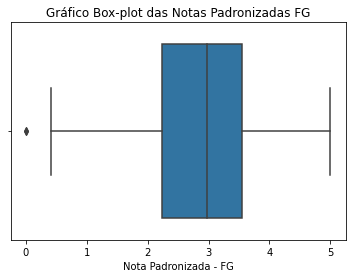

In [47]:
# Simetria
se.boxplot(x = dfMedicinaC['Nota Padronizada - FG'], ).set_title('Gráfico Box-plot das Notas Padronizadas FG')

## C - Variável Nota Padronizada - CE

In [48]:
notaCE_array = np.array(nota_ce, dtype = float)
print (notaCE_array)

[2.75931883 2.84147501 2.65882921 2.2992208  3.56535172 3.06598282
 3.64575529 2.48782849 2.9122107  2.61489558 2.25731874 2.19285655
 3.40343118 3.98303246 2.37575912 1.56653988 3.72776842 3.24960446
 3.445153   1.5776577  3.01746631 2.30222988 3.8787055  2.29439116
 2.35483623 3.06815171 2.42506838 1.31799817 2.59503436 2.18053842
 0.         3.14622116 3.26919699 3.1085906  2.69319677 3.74065924
 1.03544188 2.98248005 2.31987357 2.29803228 1.91092169 1.80988443
 2.55274844 3.07897115 2.72834992 2.2818768  1.36236298 3.53015137
 3.01909637 3.76366711 2.37961555 1.70188272 3.40506554 3.30038285
 2.79772449 2.79062271 3.20746469 3.5118463  2.9398694  3.04506588
 2.26474977 2.89522552 2.67018175 3.33646464 2.91098976 3.38724899
 3.75545955 2.83117819 3.28210568 2.91980433 3.12661362 3.21600318
 3.23848963 2.27733374 2.36713052 2.47661328 3.15174747 3.37127233
 2.68235087 2.81722116 3.61512327 1.52673519 1.95940864 2.89413595
 0.         0.9593398  2.62363195 2.6870873  2.37755156 2.9785

In [49]:
# Média
ce_media = st.mean(notaCE_array)
ce_media

2.4957169226624747

In [50]:
# Mediana
ce_mediana = st.median(notaCE_array)
ce_mediana

2.6263818740844727

In [51]:
# Moda
ce_moda = st.mode(notaCE_array) # st.multimode(inscritos_array)
ce_moda

0.0

In [52]:
# Desvio Padrao
ce_std = np.std(notaCE_array)
ce_std

0.8436729646970291

In [53]:
# Coeficiente de variação
ce_coef_variacao = ce_std/ce_media
cv_ce = ce_coef_variacao
cv_ce

0.33804834075371976

Text(0.5, 1.0, 'Gráfico Box-plot das Notas Padronizadas CE')

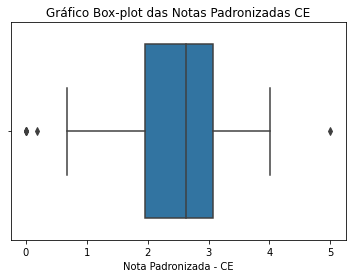

In [54]:
se.boxplot(x = dfMedicinaC['Nota Padronizada - CE'], ).set_title('Gráfico Box-plot das Notas Padronizadas CE')

## C - Variável Conceito Enade (Contínuo)

In [55]:
CEC_array = np.array(conceito_cont, dtype = float)
print (CEC_array)

[2.93778372e+00 2.99031520e+00 2.65489650e+00 2.79286027e+00
 3.55737758e+00 3.20337391e+00 3.66706848e+00 2.60473323e+00
 2.96627021e+00 2.91325545e+00 1.98711479e+00 2.23168015e+00
 3.22819018e+00 3.77044511e+00 2.37084723e+00 1.58038604e+00
 3.71643639e+00 3.20724225e+00 3.83386469e+00 1.85772610e+00
 3.09221482e+00 2.25153565e+00 4.02383709e+00 2.40299368e+00
 2.20943642e+00 3.25729322e+00 2.58041835e+00 1.56264162e+00
 2.83450770e+00 2.50165963e+00 0.00000000e+00 3.28052211e+00
 3.39449549e+00 3.21857405e+00 2.82841921e+00 3.76393700e+00
 1.19088531e+00 3.24771643e+00 2.15989423e+00 2.04461336e+00
 1.90149772e+00 1.94279861e+00 2.47747135e+00 3.08086872e+00
 2.74960423e+00 2.26531315e+00 1.83550572e+00 3.49701548e+00
 3.12867117e+00 3.80530596e+00 2.83790421e+00 1.92035091e+00
 3.37614655e+00 3.21122003e+00 2.68614483e+00 2.73697901e+00
 3.52238417e+00 3.70779896e+00 3.27603197e+00 2.99861860e+00
 2.54460955e+00 3.05415487e+00 2.85631394e+00 3.53465104e+00
 3.17151308e+00 3.388549

In [56]:
# Média
cec_media = st.mean(CEC_array)
cec_media

2.578900598381138

In [57]:
# Mediana
cec_mediana = st.median(CEC_array)
cec_mediana

2.677850127220154

In [58]:
# Moda
cec_moda = st.mode(CEC_array) # st.multimode(inscritos_array)
cec_moda

StatisticsError: ignored

In [59]:
# Desvio Padrao
cec_std = np.std(CEC_array)
cec_std

0.8261789579417299

In [60]:
# Coeficiente de variação
ce_coef_variacao = cec_std/cec_media
cv_ce = ce_coef_variacao
ce_coef_variacao

0.3203609159889102

Text(0.5, 1.0, 'Gráfico Box-plot da Variável Conceito Enade (Contínuo)')

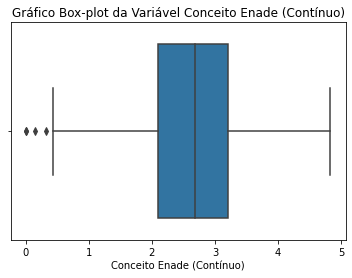

In [61]:
se.boxplot(x = dfMedicinaC['Conceito Enade (Contínuo)'], ).set_title('Gráfico Box-plot da Variável Conceito Enade (Contínuo)')

## C - Variável Conceito Enade (Faixa)

In [62]:
CEF_array = np.array(conceito_faixa, dtype = float)
print (CEF_array)

[3. 4. 3. 3. 4. 4. 4. 3. 4. 3. 3. 3. 4. 4. 3. 2. 4. 4. 4. 2. 4. 3. 5. 3.
 3. 4. 3. 2. 3. 3. 1. 4. 4. 4. 3. 4. 2. 4. 3. 3. 2. 2. 3. 4. 3. 3. 2. 4.
 4. 4. 3. 2. 4. 4. 3. 3. 4. 4. 4. 4. 3. 4. 3. 4. 4. 4. 4. 3. 4. 3. 4. 4.
 4. 3. 3. 3. 4. 4. 3. 3. 4. 2. 2. 3. 1. 2. 3. 3. 3. 3. 2. 3. 3. 3. 3. 2.
 1. 4. 1. 4. 2. 3. 3. 4. 3. 2. 4. 2. 4. 3. 2. 3. 3. 1. 5. 3. 3. 4. 2. 3.
 3. 2. 3. 3. 1. 2. 2. 4. 2. 2. 3. 3. 4. 3. 2. 3. 4. 1. 3. 3. 2. 3. 3. 3.
 4. 2. 3. 3. 4. 4. 4. 4. 2. 4. 3. 3. 3. 2. 4. 3. 3. 2. 3. 3. 4. 4. 3. 4.
 4. 5. 3. 3. 3. 3. 2. 3.]


In [63]:
# Média
cef_media = st.mean(CEF_array)
cef_media

3.1193181818181817

In [64]:
# Mediana
cef_mediana = st.median(CEF_array)
cef_mediana

3.0

In [65]:
# Moda
cef_moda = st.mode(CEF_array) # st.multimode(inscritos_array)
cef_moda

3.0

In [66]:
# Desvio Padrao
cef_std = np.std(CEF_array)
cef_std

0.8477722081680603

In [67]:
# Coeficiente de variação
ce_coef_variacao = cef_std/cef_media
cv_cef = ce_coef_variacao
cv_cef

0.2717812543489592

Text(0.5, 1.0, 'Gráfico Box-plot da Variável Conceito Enade (Faixa)')

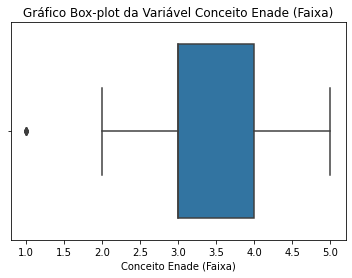

In [68]:
se.boxplot(x = dfMedicinaC['Conceito Enade (Faixa)'], ).set_title('Gráfico Box-plot da Variável Conceito Enade (Faixa)')

## C- Verificar normalidade

In [69]:
#funçao que verifica normalidade
# função para calcular simetria
def normalidade(h):
  h0 = stats.shapiro(h)
  if (h0[1] > 0.5):
    return 'normalizados'
  else:
    return 'não normalizados'

In [70]:
print('Valores de conc_inscritos são ', normalidade(conc_inscritos))
print('Valores de conc_participantes são ', normalidade(conc_participantes))
print('Valores de nota_fg são ', normalidade(nota_fg))
print('Valores de nota_ce são ', normalidade(nota_ce))
print('Valores de conceito_cont são ', normalidade(conceito_cont))
print('Valores de conceito_faixa são ', normalidade(conceito_faixa))


Valores de conc_inscritos são  não normalizados
Valores de conc_participantes são  não normalizados
Valores de nota_fg são  não normalizados
Valores de nota_ce são  não normalizados
Valores de conceito_cont são  não normalizados
Valores de conceito_faixa são  não normalizados


## Por Regiões

In [71]:
rNO = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 1]
rNE = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 2]
rSE = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 3]
rSU = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 4]
rCO = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 5]

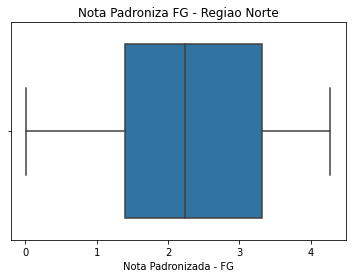

In [72]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rNO).set_title('Nota Padroniza FG - Regiao Norte')

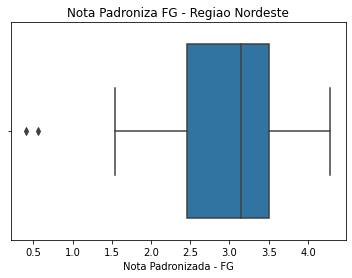

In [73]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rNE).set_title('Nota Padroniza FG - Regiao Nordeste')

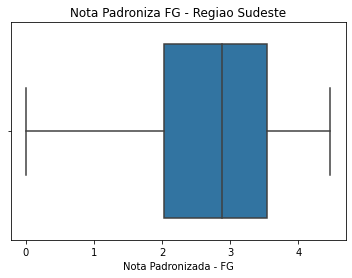

In [111]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rSE).set_title('Nota Padroniza FG - Regiao Sudeste')

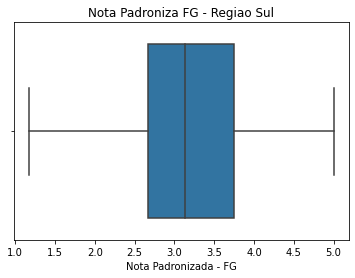

In [75]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rSU).set_title('Nota Padroniza FG - Regiao Sul')

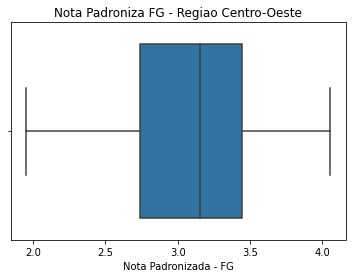

In [76]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rCO).set_title('Nota Padroniza FG - Regiao Centro-Oeste')

#**ITEM D**

In [77]:
dfMedicina = dfConceito[dfConceito['Código da Área'] == 12]
dfMedicina.head()

,Ano,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,Código da Área,Área de Enquadramento,Modalidade de Ensino,Código do Município,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa)
2,2016,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Universidade,Pessoa Jurídica de Direito Público - Federal,12,12,MEDICINA,Educação Presencial,5103403,CUIABÁ,MT,35,33,63.166668,3.473179,68.506058,2.759319,2.937784,3
8,2016,2,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pessoa Jurídica de Direito Público - Federal,140,12,MEDICINA,Educação Presencial,5300108,BRASÍLIA,DF,89,85,63.005882,3.436836,68.930588,2.841475,2.990315,4
13,2016,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Universidade,Pessoa Jurídica de Direito Público - Federal,303,12,MEDICINA,Educação Presencial,2800308,ARACAJU,SE,53,53,59.494339,2.643099,67.986794,2.658829,2.654896,3
17,2016,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Universidade,Pessoa Jurídica de Direito Público - Federal,389,12,MEDICINA,Educação Presencial,1302603,MANAUS,AM,36,35,66.708572,4.273778,66.128571,2.299221,2.792860,3
21,2016,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,Universidade,Pessoa Jurídica de Direito Público - Federal,484,12,MEDICINA,Educação Presencial,2211001,TERESINA,PI,45,45,63.433334,3.533455,72.671112,3.565352,3.557378,4


In [78]:
dfMedicina["Conceito Enade (Faixa)"] = pd.to_numeric(dfMedicina['Conceito Enade (Faixa)'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
qtdMedicina = len(dfMedicina)
print("Quantidade de Universidades com medicina: ", qtdMedicina)

MediaConceitoEnade = dfMedicina['Conceito Enade (Faixa)'].mean() 
print("Média geral(Medicina) do conceito ENADE: ", round(MediaConceitoEnade,3))

DesvioConceitoEnade = dfMedicina.loc[:,"Conceito Enade (Faixa)"].std()
print("Desvio padrão geral(Medicina) do conceito ENADE: ", round(DesvioConceitoEnade,3))

Quantidade de Universidades com medicina:  176
Média geral(Medicina) do conceito ENADE:  3.119
Desvio padrão geral(Medicina) do conceito ENADE:  0.85


In [80]:
#Intervalo de Confiança ao nível de 95%;
print("Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida")
inf,sup = t.interval(0.95, qtdMedicina-1, loc=MediaConceitoEnade, scale=DesvioConceitoEnade/np.sqrt(qtdMedicina))
print ('Limite inferior 95%:', round(inf,3))
print ('Limite superior 95%:', round(sup,3))


Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida
Limite inferior 95%: 2.993
Limite superior 95%: 3.246


In [81]:
# Número de amostras, para ERRO máximo de 10%
n = (t.ppf(0.025,qtdMedicina-1)**2)*(st.stdev(dfMedicina.iloc[:,20])**2)/(0.01**2)
print("Tamanho da amostra =",round(n))

Tamanho da amostra = 28155.0


In [82]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    tam_amostra = (t.ppf(0.025,n-1)**2)*(st.stdev(data)**2)/(0.01**2)
    return 'Coluna[{}]: Média {}, I.C.[{}, {}], e número de amostras (c/ erro máximo de 10%) {}'.format(titulo[Coluna], round(m,4), round(m-h,4), round(m+h,4), round(tam_amostra,4))

In [83]:
titulos = list(dfMedicina.columns.values)
i = 0
while i < len(titulos):
    print( "[%d] = %s"%(i, titulos[i]) )
    i+=1

[0] = Ano
[1] = Código da IES
[2] = Nome da IES
[3] = Sigla da IES
[4] = Organização Acadêmica
[5] = Categoria Administrativa
[6] = Código do Curso
[7] = Código da Área
[8] = Área de Enquadramento
[9] = Modalidade de Ensino
[10] = Código do Município
[11] = Município do Curso
[12] = Sigla da UF
[13] = Concluintes Inscritos
[14] = Concluintes Participantes
[15] = Nota Bruta - FG
[16] = Nota Padronizada - FG
[17] = Nota Bruta - CE
[18] = Nota Padronizada - CE
[19] = Conceito Enade (Contínuo)
[20] = Conceito Enade (Faixa)


In [84]:
#@title Número da coluna desejada { output-height: 10, form-width: "99%" }
Coluna =  20#@param {type:"integer"}



SAIDA = mean_confidence_interval(dfMedicina.iloc[:,Coluna])
SAIDA

NameError: ignored